In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import json

Labeling means telling a model where an object is located and what object it is. 

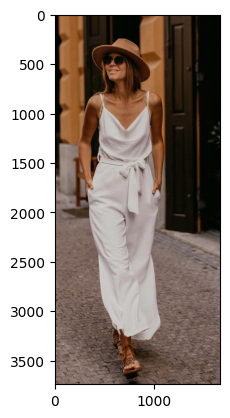

In [2]:
# Might want to spin up a local CVAT server to show labeling. 
plt.imshow(cv2.imread("./resources/image_example_raw.png")[:,:,::-1])

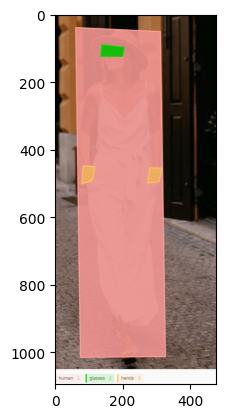

In [3]:
plt.imshow(cv2.imread("./resources/labeled_image.png")[:,:,::-1])

In [4]:
labled_data = json.load(open("./resources/labeling_results.json"))

In [5]:
labled_data

{'images': [{'width': 1672,
   'height': 3741,
   'id': 0,
   'file_name': 'images\\91f05f06-labeled_image_example_raw.png'}],
 'categories': [{'id': 0, 'name': 'glasses'},
  {'id': 1, 'name': 'hands'},
  {'id': 2, 'name': 'human'}],
 'annotations': [{'id': 0,
   'image_id': 0,
   'category_id': 2,
   'segmentation': [[215.3593314763231,
     229.25348189415044,
     1083.7437325905291,
     270.93593314763234,
     1135.8467966573817,
     3612.4791086350974,
     263.98885793871864,
     3619.4261838440116]],
   'bbox': [215.3593314763231,
    229.25348189415044,
    920.4874651810586,
    3390.172701949861],
   'ignore': 0,
   'iscrowd': 0,
   'area': 2927829.5013074074},
  {'id': 1,
   'image_id': 0,
   'category_id': 0,
   'segmentation': [[484.39030415771754,
     406.4038997214463,
     472.401114206125,
     526.7437044784697,
     696.1993266358515,
     526.7437044784697,
     712.1849132379748,
     431.30179036083035]],
   'bbox': [472.401114206125,
    406.4038997214463,
 

## Breakdown of the labels

This will tell you which images are included in the labeling dataset, as well as some information about width and height in pixels



In [6]:
images = labled_data["images"]
print(images)

[{'width': 1672, 'height': 3741, 'id': 0, 'file_name': 'images\\91f05f06-labeled_image_example_raw.png'}]


What objects you are trying to make the model detects

In [7]:
cats = labled_data["categories"]
print(cats)

[{'id': 0, 'name': 'glasses'}, {'id': 1, 'name': 'hands'}, {'id': 2, 'name': 'human'}]


The locations and types of each object that we've labled

In [8]:
annos = labled_data["annotations"]
print(annos)

[{'id': 0, 'image_id': 0, 'category_id': 2, 'segmentation': [[215.3593314763231, 229.25348189415044, 1083.7437325905291, 270.93593314763234, 1135.8467966573817, 3612.4791086350974, 263.98885793871864, 3619.4261838440116]], 'bbox': [215.3593314763231, 229.25348189415044, 920.4874651810586, 3390.172701949861], 'ignore': 0, 'iscrowd': 0, 'area': 2927829.5013074074}, {'id': 1, 'image_id': 0, 'category_id': 0, 'segmentation': [[484.39030415771754, 406.4038997214463, 472.401114206125, 526.7437044784697, 696.1993266358515, 526.7437044784697, 712.1849132379748, 431.30179036083035]], 'bbox': [472.401114206125, 406.4038997214463, 239.7837990318498, 120.33980475702339], 'ignore': 0, 'iscrowd': 0, 'area': 24535.49704604468}, {'id': 2, 'image_id': 0, 'category_id': 1, 'segmentation': [[974.4785471203309, 1670.5346522062814, 1099.9647181780797, 1674.456095051836, 1070.5538968364197, 1813.6673160690261, 954.8713328925575, 1829.353087451245]], 'bbox': [954.8713328925575, 1670.5346522062814, 145.093385

- image_id --> On which images is the annotation? 
- category_id --> What is the annotation for?
- segmentation --> Each point (x,y) that was used in the labeling process 
- bbox --> Bounding box that contains the whole object (x0, y0, x1, y1)
- area --> Number of pixels of the objects

In [9]:
annos[0]

{'id': 0,
 'image_id': 0,
 'category_id': 2,
 'segmentation': [[215.3593314763231,
   229.25348189415044,
   1083.7437325905291,
   270.93593314763234,
   1135.8467966573817,
   3612.4791086350974,
   263.98885793871864,
   3619.4261838440116]],
 'bbox': [215.3593314763231,
  229.25348189415044,
  920.4874651810586,
  3390.172701949861],
 'ignore': 0,
 'iscrowd': 0,
 'area': 2927829.5013074074}

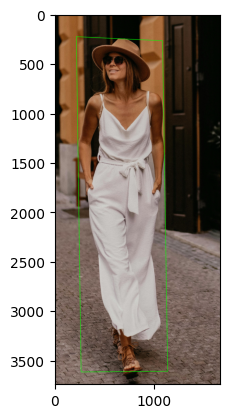

In [10]:
# Load image
img = cv2.imread("./resources/image_example_raw.png")

# Fomrat points from float to int
points = [int(x) for x in annos[0]["segmentation"][0]]

# Make sequential list a list of list with two entries (x,y) each
points = np.reshape(points,(-1,2))

# Draw the polygon
cv2.polylines(img, [points], isClosed=True, color=(0, 255, 0), thickness=3)

plt.imshow(img[:,:,::-1])

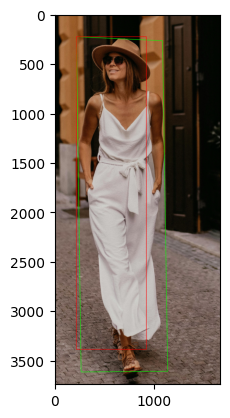

In [11]:
bbox = annos[0]["bbox"]

bbox = [int(x) for x in bbox]

cv2.rectangle(img, (bbox[0], bbox[1]), (bbox[2], bbox[3]), color=(0, 0, 255), thickness=3)

plt.imshow(img[:,:,::-1])